<a href="https://colab.research.google.com/github/chaimaesriti/csriti/blob/main/a2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multi-class Logistic Regression Modelling**




In this notebook, we present the code related to all the multi-class logistic regression modelling and the data analysis of the wine dataset.

### **Task 1**: Acquire, preprocess, and analyze the data

In [1]:
# Necessary Imports
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.subplots as sp
import seaborn as sns
import matplotlib.pyplot as plt

Here, we read the wine.csv downloaded from
https://archive.ics.uci.edu/dataset/109/wine

The following analysis will investigate:


* Shape of the dataset (13 features of wine constituents, the wine class as the target feature of 178 observations)
* Type of the features (all numerical)
* Missing Values (no missing values in this dataset)
* Classes of Wine (balanced classes)
* Descriptive statistics
* Univariate boxplots
* Bivariate boxplots (in terms of target)
* Correlations
* Bonus : Outliers removal



In [2]:
wine = pd.read_csv("wine.csv", usecols=lambda column: column != 'Unnamed: 0')

In [3]:
wine.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
wine.shape

(178, 14)

In [5]:
wine.dtypes

Alcohol                         float64
Malicacid                       float64
Ash                             float64
Alcalinity_of_ash               float64
Magnesium                         int64
Total_phenols                   float64
Flavanoids                      float64
Nonflavanoid_phenols            float64
Proanthocyanins                 float64
Color_intensity                 float64
Hue                             float64
0D280_0D315_of_diluted_wines    float64
Proline                           int64
class                             int64
dtype: object

In [7]:
wine.isna().sum() # no missing values in the features

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
class                           0
dtype: int64

In [8]:
wine['class'].value_counts(normalize=True)

2    0.398876
1    0.331461
3    0.269663
Name: class, dtype: float64

In [9]:
wine.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


From the table above, we can observe that the magniture of the features is not uniform (not one the same scale). We suspect normalization is needed. In the following, we want to examine the different boxplots.

In [10]:
# visualizing distribution of dependent features
box_plot_traces = []
for feature in wine.drop(['class'],axis=1).columns:
    trace = go.Box(y=wine[feature], name=feature)
    box_plot_traces.append(trace)

layout = go.Layout(
    title='Box Plot for Wine Dataset Features',
    xaxis=dict(title='Features'),
    yaxis=dict(title='Value'),
)
fig = go.Figure(data=box_plot_traces, layout=layout)
fig.show()
# clearly, standardization is needed.

The 13 wine constituents have different scales, we will scale the dataset accordingly. But we will perform this step after we split the train-test data in the modelling experimentation phase to avoid data leakage.
For visualization purpose, we will visualize the boxplots after normalization to see its effect.

Here are the boxplots after normalization:

In [11]:
# Let's standardize raw wine and wine with outliers removed
from sklearn.preprocessing import StandardScaler #to replace with formula
scaler = StandardScaler()
wine_data = wine.drop(columns=['class'])
wine_class = wine['class']
scaled_wine = pd.DataFrame(scaler.fit_transform(wine_data), columns=wine_data.columns)
box_plot_traces = []
for feature in scaled_wine.columns:
    trace = go.Box(y=scaled_wine[feature], name=feature)
    box_plot_traces.append(trace)
layout = go.Layout(
    title='Box Plot for Wine Dataset Features',
    xaxis=dict(title='Features'),
    yaxis=dict(title='Value'),
)
fig = go.Figure(data=box_plot_traces, layout=layout)
fig.show()

As we can see, there are outliers in some of the features, we can perform IQR outlier removal for experimentation. We will not carry on with this dataset (with removed outliers) simply because the dataset is small and we want to preserve the maximum of information possible to keep the balance between the three classes. We used it for experimentation only.

In [13]:
# Removing outliers using IQR rule
def remove_outliers(df):
    """
    Remove rows from a DataFrame where outliers using IQR.
    """
    df_outliers_rm = df.copy()
    for column_name in df.columns:
        # Compute Q1, Q3
        q1 = df[column_name].quantile(0.25)
        q3 = df[column_name].quantile(0.75)

        # Compute IQR (Interquartile Range)
        iqr = q3 - q1

        # Compute lower/upped bands
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Dismiss outliers
        df_outliers_rm = df_outliers_rm[(df_outliers_rm[column_name] >= lower_bound) & (df_outliers_rm[column_name] <= upper_bound)]

    return df_outliers_rm

In [14]:
wine_outliers_rm = remove_outliers(wine)
wine_outliers_rm.shape # 17 outliers were removed from dataset (we will use this dataset later on for experimentation)

(161, 14)

After IQR outliers removal, we can observe that the points in the previous boxplot disappeared and we have a more consistent distribution accross our data.

In [15]:
# Let's standardize raw wine and wine with outliers removed
from sklearn.preprocessing import StandardScaler #to replace with formula
scaler = StandardScaler()
wine_data = wine.drop(columns=['class'])
wine_class = wine['class']
scaled_wine = pd.DataFrame(scaler.fit_transform(wine_outliers_rm.drop(columns=['class'])), columns=wine_data.columns)
box_plot_traces = []
for feature in scaled_wine.columns:
    trace = go.Box(y=scaled_wine[feature], name=feature)
    box_plot_traces.append(trace)
layout = go.Layout(
    title='Box Plot for Wine Dataset Features',
    xaxis=dict(title='Features'),
    yaxis=dict(title='Value'),
)
fig = go.Figure(data=box_plot_traces, layout=layout)
fig.show()

Now, let us visualize the boxplot of the 13 wine constituents in terms of the different wine classes.

As we can observe, among all features, there is a distinguishable difference from one class to the other - which is supposed to ease the classification task.

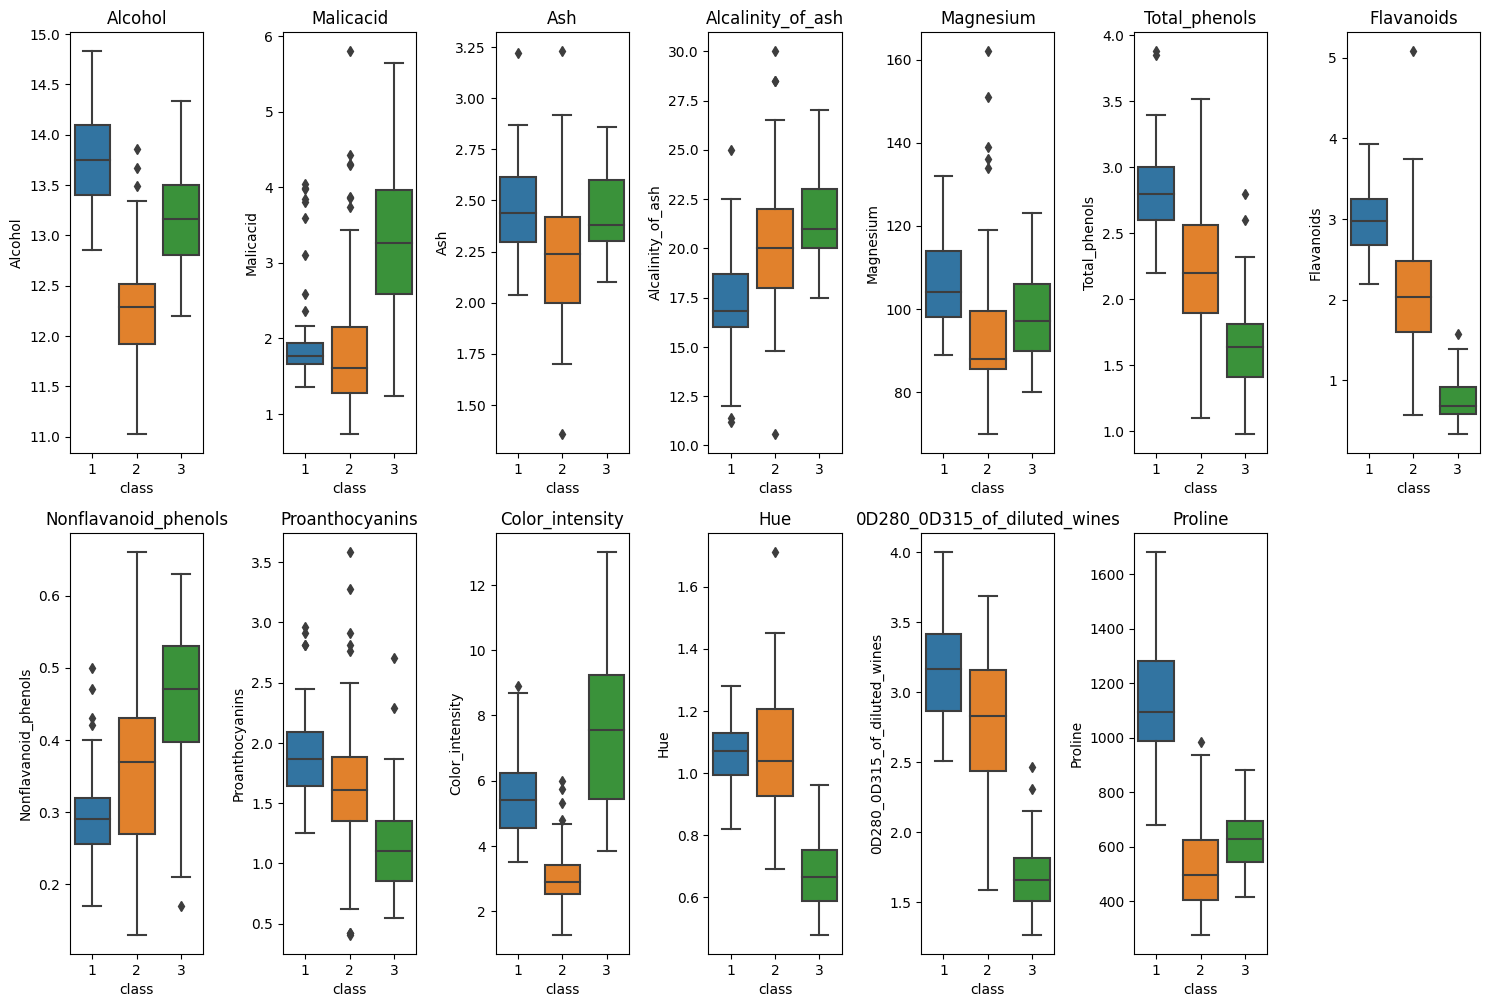

In [16]:
# Visualize numerical features in term of class
n_cols = 7
n_rows = (len(wine_data) - 1) // n_cols + 1
plt.figure(figsize=(15, 5 * n_rows))

for i, feature in enumerate(wine_data.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x='class', y=feature, data=wine)
    plt.title(f'{feature}')

plt.tight_layout()  # to ensure non-overlapping subplots
plt.show()

Finally, let us compute the correlations between the different numerical features. This step is done to avoid multicollinearity when dealing with the regression but in this project is done for exploration. Correlations are within an acceptable range.
However, Flavanoids and Total_Phenols are clearly very correlated (0.86). In the experimentation with the modelling, we can adjust a model with Total_Phenols dropped.

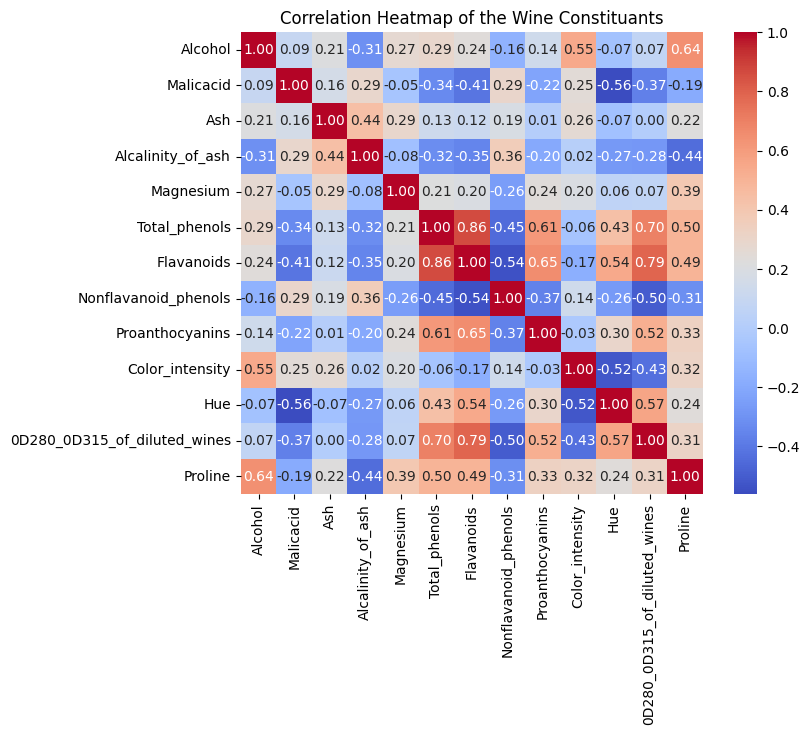

In [17]:
# visualize correlations between numerical features
corr_matrix = wine_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Heatmap of the Wine Constituants')
plt.show()

## **Task 2**:  Implement the models

Here we implement the following:

1. Implement logistic regression with gradient descent.
2. Implement mini-batch stochastic gradient descent for logistic regression.
3. Implement l2 regularization for experimentation purposes.

Since we are dealing with a problem of 3 classes classification, we call the class SoftmaxRegression.

In addition, we defined a score function to compute the models overall accuracy.

After implementing the class. We define a custom function called custom_classification_report to compute the respective accuracy, precision, recall and f1-score of the model for each of the three classes.

In [6]:
import numpy as np

class SoftmaxRegression(object):
    """
    Softmax regression classifier.
    """
    def __init__(self, lr=0.01, epochs=10, l2=0.0, minibatches=1, n_classes=None, random_seed=None):
        self.lr = lr
        self.epochs = epochs
        self.l2 = l2
        self.minibatches = minibatches
        self.n_classes = n_classes
        self.random_seed = random_seed
        self._is_fitted = False  # Initialize the _is_fitted flag

    def _fit(self, X, y, X_val=None, y_val=None, init_params=True):
        self._is_fitted = True  # Set the flag here
        # Validate input shapes
        if not isinstance(X, np.ndarray) or not isinstance(y, np.ndarray):
            raise ValueError("Input data should be numpy arrays.")
        if X.ndim != 2:
            raise ValueError("X should be a 2D array.")

        if init_params:
            if self.n_classes is None:
                self.n_classes = np.max(y) + 1
            self._n_features = X.shape[1]
            self.b_, self.w_ = self._init_params(weights_shape=(self._n_features, self.n_classes),
                                                 bias_shape=(self.n_classes,),
                                                 random_seed=self.random_seed)
            self.cost_ = []

        y_enc = self._one_hot(y, self.n_classes)
        train_scores = []
        test_scores = []

        for i in range(self.epochs):
            for idx in self._yield_minibatches_idx(n_batches=self.minibatches, data_ary=y):
                net = self._net_input(X[idx])
                softm = self._softmax(net)
                diff = softm - y_enc[idx]

                # gradient -> n_features x n_classes
                grad = np.dot(X[idx].T, diff)

                # update weights and biases
                self.w_ -= self.lr * (grad + self.l2 * self.w_)
                self.b_ -= self.lr * np.sum(diff, axis=0)

            # compute cost for the epoch
            net = self._net_input(X)
            softm = self._softmax(net)
            cross_ent = self._cross_entropy(softm, y_enc)
            cost = self._cost(cross_ent)
            self.cost_.append(cost)

            # Compute train and test scores
            train_scores.append(self.score(X, y))
            if X_val is not None and y_val is not None:
                test_scores.append(self.score(X_val, y_val))

            print(f'Epoch {i} ==> Loss = {cost}')

        return train_scores, test_scores

    def fit(self, X, y, X_val=None, y_val=None, init_params=True):
        if self.random_seed is not None:
            np.random.seed(self.random_seed)
        train_scores, test_scores = self._fit(X, y, X_val, y_val, init_params)
        self._is_fitted = True
        return train_scores, test_scores

    def _predict(self, X):
        probas = self.predict_proba(X)
        return self._to_classlabels(probas)

    def predict(self, X):
        if not self._is_fitted:
            raise AttributeError('Model is not fitted yet.')
        return self._predict(X)

    def predict_proba(self, X):
        net = self._net_input(X)
        return self._softmax(net)

    def _net_input(self, X):
        return X.dot(self.w_) + self.b_

    def _softmax(self, z):
        # Improve numerical stability
        z -= np.max(z, axis=1, keepdims=True)
        return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T

    def _cross_entropy(self, output, y_target):
        return - np.sum(np.log(output) * y_target, axis=1)

    def _cost(self, cross_entropy):
        L2_term = self.l2 * np.sum(self.w_ ** 2)
        return 0.5 * np.mean(cross_entropy + L2_term)

    def _to_classlabels(self, z):
        return z.argmax(axis=1)

    def _init_params(self, weights_shape, bias_shape=(1,), dtype='float64', scale=0.01, random_seed=None):
        if random_seed:
            np.random.seed(random_seed)
        w = np.random.normal(loc=0.0, scale=scale, size=weights_shape)
        b = np.zeros(shape=bias_shape)
        return b.astype(dtype), w.astype(dtype)

    def _one_hot(self, y, n_labels):
        return np.eye(n_labels)[y]

    def _yield_minibatches_idx(self, n_batches, data_ary):
        indices = np.arange(data_ary.shape[0])
        if n_batches > 1:
            minis = np.array_split(indices, n_batches)
        else:
            minis = (indices,)
        return minis

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y == y_pred)
    def get_weights(self):
        """Return the weights of the fitted model."""
        if not self._is_fitted:
            raise AttributeError('Model is not fitted yet.')
        return self.w_

    def get_bias(self):
        """Return the bias of the fitted model."""
        if not self._is_fitted:
            raise AttributeError('Model is not fitted yet.')
        return self.b_

Here is the classification report function we are going to use.

In [7]:
def classification_report(y_true, y_pred):
    unique_labels = np.unique(np.concatenate((y_true, y_pred)))
    report = []
    for label in unique_labels:
        tp = np.sum((y_true == label) & (y_pred == label))
        fp = np.sum((y_true != label) & (y_pred == label))
        fn = np.sum((y_true == label) & (y_pred != label))
        tn = np.sum((y_true != label) & (y_pred != label))

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0
        accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0.0

        report.append({
            'class': label,
            'precision': precision,
            'recall': recall,
            'f1-score': f1,
            'accuracy': accuracy,
        })
    return pd.DataFrame(report)

## **Task 3** : Run experiments



### **Experiment 1** :

We first divide the Wine dataset to arrays X and y.
We then perform a **80/20 train test split** and report the **overall accuracy** on both the training set
and test set for the Softmax Regression with the following:

1.   Gradient Descent
2.   Stochastic Gradient Descent
3.   20 batches (mini-batch SGD)

The following experiments will help us find the combination of the best hyperparameters. Here we are using ad-hoc params to adjust the three softmax models.


In [8]:
from sklearn.model_selection import train_test_split
X = wine.drop('class',axis=1).to_numpy()
y = wine['class'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

After splitting, we **scale** both datasets to avoid giving high magnitude to certain features.

In [9]:
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

NameError: ignored

Once the data is scale, we adjust the model using the following parameters:

*   Learning rate = 0.001
*   Epochs=10
*   minibatches=1 for gradient descent
*   L2=0

### a) Gradient Descent

In [ ]:
lr_gd = SoftmaxRegression(lr=0.001, epochs=10, minibatches=1, random_seed=123)
lr_gd.fit(X_train_scaled, y_train)

In [61]:
y_pred = lr_gd.predict(X_test_scaled)
lr_gd.predict(X_test_scaled), y_test

(array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 3, 1, 2, 2, 2, 1, 2, 1, 2,
        2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1]),
 array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
        2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1]))

In [62]:
lr_gd.get_weights(), lr_gd.get_bias()

(array([[ 0.00055877,  0.25612452, -0.32151261,  0.0517133 ],
        [-0.00115055, -0.04937145, -0.14218949,  0.17488394],
        [ 0.00765261,  0.09542994, -0.16708565,  0.0602591 ],
        [ 0.0057996 , -0.2126657 ,  0.11097828,  0.09562936],
        [ 0.01972407,  0.11596697, -0.08449056,  0.00662909],
        [ 0.01168314,  0.20467635, -0.02708699, -0.16459155],
        [-0.01080953,  0.22111796,  0.03745898, -0.27189949],
        [-0.00236219, -0.1203416 , -0.01925703,  0.1014005 ],
        [-0.01090541,  0.09379837,  0.04693844, -0.14700723],
        [ 0.01311651,  0.05594227, -0.32291124,  0.25480405],
        [-0.01098541,  0.08321904,  0.15392424, -0.24965917],
        [ 0.00206974,  0.18713518,  0.12212789, -0.28001246],
        [ 0.0187602 ,  0.33654865, -0.28537201, -0.06109678]]),
 array([-0.25679075,  0.05830025,  0.18721055,  0.01127995]))

In [55]:
print(f'Model Train Accuracy is {lr_gd.score(X_train_scaled,y_train)}')
print(f'Model Test Accuracy is {lr_gd.score(X_test_scaled,y_test)}')

Model Train Accuracy is 0.9929577464788732
Model Test Accuracy is 1.0


In [63]:
classification_report(y_test, y_pred)

,class,precision,recall,f1-score,accuracy
0,1,1.000000,1.000000,1.000000,1.000000
1,2,1.000000,0.928571,0.962963,0.972222
2,3,0.888889,1.000000,0.941176,0.972222


### b) Stochastic Gradient Descent

In [ ]:
lr_sgd = SoftmaxRegression(lr=0.001, epochs=10, minibatches=178, random_seed=123)
lr_sgd.fit(X_train_scaled, y_train, X_test_scaled, y_test)

In [ ]:
lr_sgd.predict(X_test_scaled), y_test

In [ ]:
lr_sgd.get_weights(), lr_sgd.get_bias()

In [71]:
print(f'Model Train Accuracy is {lr_sgd.score(X_train_scaled,y_train)}')
print(f'Model Test Accuracy is {lr_sgd.score(X_test_scaled,y_test)}')

Model Train Accuracy is 0.9647887323943662
Model Test Accuracy is 0.9722222222222222


### b) Mini-Batch Gradient Descent (10)

In [ ]:
lr_mbsgd = SoftmaxRegression(lr=0.001, epochs=10, minibatches=16, random_seed=123)
lr_mbsgd.fit(X_train_scaled, y_train, X_test_scaled, y_test)

In [ ]:
lr_mbsgd.predict(X_test_scaled), y_test

In [ ]:
lr_mbsgd.get_weights(), lr_mbsgd.get_bias()

In [75]:
print(f'Model Train Accuracy is {lr_mbsgd.score(X_train_scaled,y_train)}')
print(f'Model Test Accuracy is {lr_mbsgd.score(X_test_scaled,y_test)}')

Model Train Accuracy is 0.9647887323943662
Model Test Accuracy is 0.9722222222222222


All methods return the same overall train and test accuracy - this might be due due to the choice of learning rate. We will be investigating more in the following experiments.

### **Experiment 2** :

Here, we repeat the same experiment above but this time with a 5-fold cross-validation. We then report the performance metrics on both the training and the test sets.

In [ ]:
wine.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [76]:
from sklearn.model_selection import KFold
def kfold_cv(wine, lr):
    kf = KFold(5, shuffle=True, random_state=42) # Use for KFold classification
    score = []
    i = 1
    for train_index, test_index in kf.split(wine):
        X_train = wine.iloc[train_index].drop('class',axis=1).to_numpy()
        X_test = wine.iloc[test_index].drop('class',axis=1).to_numpy()
        y_train = wine['class'][train_index].to_numpy()
        y_test = wine['class'][test_index].to_numpy()
        X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)
        lr.fit(X_train_scaled, y_train)
        score.append([i, lr.score(X_train_scaled,y_train), lr.score(X_test_scaled,y_test)])
        i += 1
    return score

In [77]:
import plotly.graph_objects as go

def plot_accuracies(idx, train_accuracies, test_accuracies):
    # Create a plotly figure
    fig = go.Figure()

    # Add training accuracies
    fig.add_trace(go.Scatter(x=idx, y=train_accuracies, mode='lines+markers', name='Training Accuracy', marker=dict(color='blue')))

    # Add testing accuracies
    fig.add_trace(go.Scatter(x=idx, y=test_accuracies, mode='lines+markers', name='Testing Accuracy', marker=dict(color='red')))

    # Update layout
    fig.update_layout(
        title='Training and Testing Accuracies',
        xaxis_title='Index',
        yaxis_title='Accuracy',
        xaxis=dict(tickvals=idx),
        margin=dict(l=20, r=20, t=40, b=20),
        hovermode='x',
        autosize=False,
        width=1000,
        height=600,
        template="plotly"
    )

    # Display the figure
    fig.show()


### a) Gradient Descent - 5-Fold cross-validation

In [ ]:
lr = SoftmaxRegression(lr=0.001, epochs=10, minibatches=1, random_seed=123)
folds, train_accuracies, test_accuracies = zip(*kfold_cv(wine, lr))

Let's see the plot of train/test accuracies in terms of folds

In [91]:
plot_accuracies(folds, train_accuracies, test_accuracies)

### b) Mini-Batch Gradient Descent - 5-Fold cross-validation (16)

In [ ]:
lr_mbsgd = SoftmaxRegression(lr=0.001, epochs=10, minibatches=178, random_seed=123)
folds, train_accuracies, test_accuracies = zip(*kfold_cv(wine, lr_mbsgd))

In [93]:
plot_accuracies(folds, train_accuracies, test_accuracies)

Clearly, cross-validation is a good way to validate performance of the model, although the model is performing well overall, but from one fold to the other, we observe differences in accuracy which helps accounting for randomness in split when judging of the goodness of the model.

### **Experiment 3**:
Here, we perform sample growing subsets of the training data (20%,30%,...80%). Let us bserve how
does the size of training data affects the performance for both models.

First, we implement the function that computes the train and test scores by split - we add 50 iterations to stabilize the metrics.

In [95]:
def calculate_score_split(X, y, split_sizes, lr, num_runs=200):
  split_score = []
  for split_size in split_sizes:

    train_scores = []
    test_scores = []

    for run in range(num_runs):
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size,random_state=None) # no set.seed
      X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

      # fit the model
      lr.fit(X_train_scaled, y_train)

      # append scores
      train_scores.append(lr.score(X_train_scaled,y_train))
      test_scores.append(lr.score(X_test_scaled,y_test))
    split_score.append([1-split_size, np.mean(train_scores), np.mean(test_scores)])
  return split_score

Here are the test splits we want to test.

In [87]:
split_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

We then use the model adjusted in 1 and visualize the improvement of train/test over time.

In [104]:
lrgd = SoftmaxRegression(lr=0.001, epochs=1000, minibatches=1, random_seed=123)

In [ ]:
split_score = calculate_score_split(X,y,split_sizes, lrgd)
split_size, train_accuracies, test_accuracies = zip(*split_score)

In [97]:
plot_accuracies(split_size, train_accuracies, test_accuracies)

As the training set size increases from a small number, the performance on the test set improves overall and the gain in test accuracy becomes less substantial from a certain degree (here 0.5)

### **Experiment 4:**
Here, we try different minibatch sizes, e.g., 8, 16, 32, 64, and 128 in order to compare the convergence speed
and final performance of different batch sizes to the fully batched baseline.


Here we implement the function that will provide the

In [ ]:
# def calculate_batch_score(X, y, minibatches, num_runs=200):
#   batch_score = []
#   for minibatch in minibatches:

#     train_scores = []
#     test_scores = []

#     for run in range(num_runs):
#       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=None) # no set.seed
#       X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

#       # fit the model
#       lrgd = SoftmaxRegression(lr=0.001, epochs=100, minibatches=minibatch, random_seed=123)
#       lrgd.fit(X_train_scaled, y_train)

#       # append scores
#       train_scores.append(lrgd.score(X_train_scaled,y_train))
#       test_scores.append(lrgd.score(X_test_scaled,y_test))
#     batch_score.append([minibatch, np.mean(train_scores), np.mean(test_scores)])
#   return batch_score

Let's iterate through the minibatch sizes 8, 16, 64, and 128


In [ ]:
minibatches = [8, 16, 32, 64, 128]
histories = []
train_scores = []
test_scores = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
scaler = StandardScaler()
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

for batch_size in minibatches:
    # Fit the model
    lrmbsgd = SoftmaxRegression(lr=0.001, epochs=1000, minibatches=batch_size)

    train_score_epoch, test_score_epoch = lrmbsgd.fit(X_train_scaled, y_train, X_test_scaled, y_test)
    hist = lrmbsgd.cost_

    histories.append(hist)
    train_scores.append(train_score_epoch)  # append scores for this minibatch size
    test_scores.append(test_score_epoch)

In [105]:
# Plotting the history using Plotly
fig = go.Figure()

for i, hist in enumerate(histories):
    fig.add_trace(go.Scatter(x=list(range(len(hist))),
                             y=hist,
                             mode='lines',
                             name=f'Batch size: {minibatches[i]}'))

fig.update_layout(title='Training Loss for Different Batch Sizes',
                  xaxis_title='Epochs',
                  yaxis_title='Loss')

fig.show()

Overall, for this particular training scenario, varying batch sizes between 8 and 128 do not exhibit substantial differences in the model's ability to reduce training loss over the observed epochs.

Let us see what's the optimal batch size that has optimal train/test scores and optimal generalization.

In [107]:
def plot_scores_plotly(minibatches, train_scores, test_scores):
    """
    Plot training and testing scores for every epoch across different batch sizes using Plotly.

    :param minibatches: list of batch sizes
    :param train_scores: list of training scores for each batch size
    :param test_scores: list of testing scores for each batch size
    """

    fig = go.Figure()

    # For each batch size, add a training trace and a test trace
    for i, batch_size in enumerate(minibatches):
        fig.add_trace(go.Scatter(x=list(range(len(train_scores[i]))),
                                 y=train_scores[i],
                                 mode='lines',
                                 name=f"Train-{batch_size}"))

        fig.add_trace(go.Scatter(x=list(range(len(test_scores[i]))),
                                 y=test_scores[i],
                                 mode='lines',
                                 name=f"Test-{batch_size}"))

    fig.update_layout(title="Training and Testing Scores vs. Batch Size",
                      xaxis_title="Epoch",
                      yaxis_title="Score",
                      legend_title="Batch Size")

    fig.show()

# Call the function
plot_scores_plotly(minibatches, train_scores, test_scores)

### **Experiment 5:**
Present the performance of both linear and logistic regression with at least three different
learning rates.

In [ ]:
learning_rates = [0.5, 0.4, 0.3, 0.2, 0.1, 0.01, 0.001, 0.0001, 0.00001]
histories = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
scaler = StandardScaler()
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

for learning_rate in learning_rates:
    # Fit the model
    lrmbsgd = SoftmaxRegression(lr=learning_rate, epochs=1000, minibatches=16, random_seed=123)
    lrmbsgd.fit(X_train_scaled, y_train)
    train_score_epoch, test_score_epoch = lrmbsgd.fit(X_train_scaled, y_train, X_test_scaled, y_test)
    hist = lrmbsgd.cost_
    histories.append(hist)
    train_scores.append(train_score_epoch)
    test_scores.append(test_score_epoch)

Let us visualize the difference in training loss by learning rates

In [112]:
# Plotting the history using Plotly
fig = go.Figure()

for i, hist in enumerate(histories):
    fig.add_trace(go.Scatter(x=list(range(len(hist))),
                             y=hist,
                             mode='lines',
                             name=f'Learning Rate: {learning_rates[i]}'))

fig.update_layout(title='Training Loss for Different Learning Rates',
                  xaxis_title='Epochs',
                  yaxis_title='Loss')

fig.show()

The optimal learning rate is crucial for efficient model training. Based on the graph, **learning rate = 0.0001** seem to provide a good balance between rapid convergence and low training loss. Extremely high or low learning rates may lead to overly optimal outcomes, either by overshooting the minimum or converging too slowly.

Let us visualize train/test scores and optimal generalization by learning rates.

In [114]:
def plot_scores_plotly(learning_rates, train_scores, test_scores):
    """
    Plot training and testing scores for every epoch across different batch sizes using Plotly.

    :param minibatches: list of batch sizes
    :param train_scores: list of training scores for each batch size
    :param test_scores: list of testing scores for each batch size
    """

    fig = go.Figure()

    # For each batch size, add a training trace and a test trace
    for i, learning_rate in enumerate(learning_rates):
        fig.add_trace(go.Scatter(x=list(range(len(train_scores[i]))),
                                 y=train_scores[i],
                                 mode='lines',
                                 name=f"Train-{learning_rate}"))

        fig.add_trace(go.Scatter(x=list(range(len(test_scores[i]))),
                                 y=test_scores[i],
                                 mode='lines',
                                 name=f"Test-{learning_rate}"))

    fig.update_layout(title="Training and Testing Scores vs. Learning Rate",
                      xaxis_title="Epoch",
                      yaxis_title="Score",
                      legend_title="Learning Rate")

    fig.show()

# Call the function
plot_scores_plotly(learning_rates, train_scores, test_scores)

### **Experiment 6** : Other experimentation
- Experiment with different regularization l2 values.
- Train a model without outliers, compare with baseline model.
- Train a model with high correlated features dropped, compare with baseline.
